<a href="https://colab.research.google.com/github/FathimaNazarudeen/s3./blob/main/1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! /content/drive/MyDrive/autism -d /content/data

/bin/bash: /content/drive/MyDrive/autism: No such file or directory


In [ ]:
!unzip /content/drive/MyDrive/Autism-20221013T161926Z-001.zip -d /content/data

Archive:  /content/drive/MyDrive/Autism-20221013T161926Z-001.zip
   creating: /content/data/Autism/.ipynb_checkpoints/
  inflating: /content/data/Autism/autism-2.txt  
   creating: /content/data/Autism/test/.ipynb_checkpoints/
  inflating: /content/data/Autism/valid/autistic/41.jpg  
  inflating: /content/data/Autism/valid/autistic/38.jpg  
  inflating: /content/data/Autism/valid/autistic/16.jpg  
  inflating: /content/data/Autism/valid/autistic/11.jpg  
  inflating: /content/data/Autism/valid/autistic/18.jpg  
  inflating: /content/data/Autism/valid/autistic/14.jpg  
  inflating: /content/data/Autism/valid/autistic/39.jpg  
  inflating: /content/data/Autism/valid/autistic/20.jpg  
  inflating: /content/data/Autism/valid/autistic/29.jpg  
  inflating: /content/data/Autism/valid/autistic/48.jpg  
  inflating: /content/data/Autism/valid/autistic/26.jpg  
  inflating: /content/data/Autism/valid/autistic/21.jpg  
  inflating: /content/data/Autism/valid/autistic/19.jpg  
  inflating: /conte

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1./255)
valid_datagen=ImageDataGenerator(rescale=1./255)

In [ ]:
train_dir="/content/data/Autism/train"
val_dir="/content/data/Autism/valid"

In [ ]:
train_data=train_datagen.flow_from_directory(train_dir, target_size=(224, 224), class_mode='binary', batch_size=16,seed=42)
valid_data=valid_datagen.flow_from_directory(val_dir, target_size=(224, 224), class_mode='binary',batch_size=16,seed=42)

Found 1826 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [ ]:
from tensorflow.keras import regularizers

In [ ]:
model_1=tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(filters=10,
                                                           kernel_size=3,
                                                           activation="relu",
                                                           input_shape=(224,224,3)),
                                    tf.keras.layers.Dropout(0.2),
                                    tf.keras.layers.Conv2D(10,3,activation="relu",
    bias_regularizer=regularizers.L2(1e-4),
    activity_regularizer=regularizers.L2(1e-5)),
                                    
                                    tf.keras.layers.MaxPool2D(pool_size=2,
                                                              padding="valid"),
                                    tf.keras.layers.Conv2D(10,3,activation="relu",
    bias_regularizer=regularizers.L2(1e-4),
    activity_regularizer=regularizers.L2(1e-5)),
                                    tf.keras.layers.Conv2D(10,3,activation="relu",
    bias_regularizer=regularizers.L2(1e-4),
    activity_regularizer=regularizers.L2(1e-5)),
                                    
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(2,activation="softmax")])

In [ ]:
model_1.compile(loss="sparse_categorical_crossentropy",optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])

In [ ]:
model_1.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 dropout_6 (Dropout)         (None, 222, 222, 10)      0         
                                                                 
 conv2d_25 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 110, 110, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_27 (Conv2D)          (None, 106, 106, 10)      910       
                                                      

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=20)

In [ ]:
model=model_1.fit(train_data,epochs=100,validation_data=valid_data,callbacks=[callback])

Epoch 1/100
115/115 [==============================] - 5s 39ms/step - loss: 0.7043 - accuracy: 0.5936 - val_loss: 0.8979 - val_accuracy: 0.5000
Epoch 2/100
115/115 [==============================] - 4s 37ms/step - loss: 0.6192 - accuracy: 0.6495 - val_loss: 0.6377 - val_accuracy: 0.5900
Epoch 3/100
115/115 [==============================] - 4s 37ms/step - loss: 0.5557 - accuracy: 0.7251 - val_loss: 0.5962 - val_accuracy: 0.6900
Epoch 4/100
115/115 [==============================] - 4s 37ms/step - loss: 0.4688 - accuracy: 0.7853 - val_loss: 0.5941 - val_accuracy: 0.6800
Epoch 5/100
115/115 [==============================] - 4s 37ms/step - loss: 0.3667 - accuracy: 0.8505 - val_loss: 0.5857 - val_accuracy: 0.7500
Epoch 6/100
115/115 [==============================] - 4s 37ms/step - loss: 0.2368 - accuracy: 0.9096 - val_loss: 0.7439 - val_accuracy: 0.7400
Epoch 7/100
115/115 [==============================] - 4s 37ms/step - loss: 0.1311 - accuracy: 0.9551 - val_loss: 1.0815 - val_accuracy:

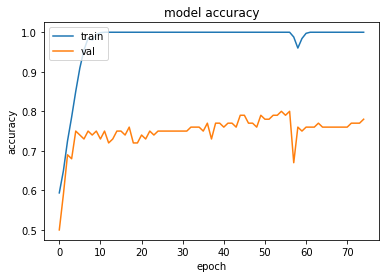

In [ ]:
import matplotlib.pyplot as plt
import keras
from matplotlib import pyplot as plt
plt.plot(model.history['accuracy'])
plt.plot(model.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

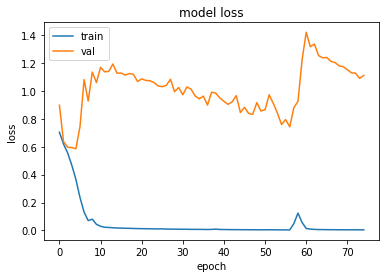

In [ ]:
plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')

plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
from tensorflow.keras.preprocessing import image

In [ ]:
def predictImage(filename):
  img1=image.load_img(filename,target_size=(224,224))
  plt.imshow(img1)
  Y=image.img_to_array(img1)
  X=np.expand_dims(Y,axis=0)
  val=model_1.predict(X)
  print(val[0][0])
  
  
  #print(val[[0]])
  if val[0][0]<val[0][1]:
    plt.xlabel("Not autism",fontsize=30)
  elif val[0][0]>val[0][1]:
    plt.xlabel("Autism",fontsize=30)


1/1 [==============================] - 0s 19ms/step
3.7415204e-38


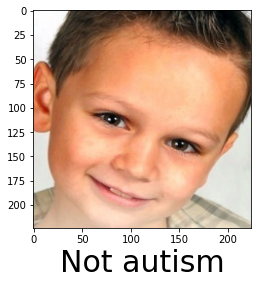

In [ ]:
predictImage("/content/data/Autism/test/non_autistic/001.jpg")

In [ ]:
AlexNet = keras.models.Sequential([
    keras.layers.Conv2D(filters=64, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(224,224,3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=128, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same",bias_regularizer=regularizers.L2(1e-4),
    activity_regularizer=regularizers.L2(1e-5)),
    
    
    
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(2, activation='softmax')
])

In [ ]:
AlexNet.compile(loss='sparse_categorical_crossentropy', optimizer=tf.optimizers.SGD(lr=0.001), metrics=['accuracy'])
AlexNet.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_55 (Conv2D)          (None, 54, 54, 64)        23296     
                                                                 
 batch_normalization_27 (Bat  (None, 54, 54, 64)       256       
 chNormalization)                                                
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 26, 26, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_56 (Conv2D)          (None, 26, 26, 128)       204928    
                                                                 
 batch_normalization_28 (Bat  (None, 26, 26, 128)      512       
 chNormalization)                                                
                                                     

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
history_2=AlexNet.fit(train_data,
                      epochs=100,
                      
                      validation_data=valid_data,
                       callbacks=[callback]
                      )

Epoch 1/100
115/115 [==============================] - 5s 39ms/step - loss: 1.4784 - accuracy: 0.5827 - val_loss: 0.7252 - val_accuracy: 0.5100
Epoch 2/100
115/115 [==============================] - 4s 36ms/step - loss: 1.0832 - accuracy: 0.6451 - val_loss: 0.9021 - val_accuracy: 0.5000
Epoch 3/100
115/115 [==============================] - 4s 36ms/step - loss: 1.0115 - accuracy: 0.6495 - val_loss: 0.7287 - val_accuracy: 0.6600
Epoch 4/100
115/115 [==============================] - 4s 36ms/step - loss: 0.8621 - accuracy: 0.7065 - val_loss: 0.6703 - val_accuracy: 0.6700
Epoch 5/100
115/115 [==============================] - 4s 36ms/step - loss: 0.8292 - accuracy: 0.6873 - val_loss: 0.7390 - val_accuracy: 0.6800
Epoch 6/100
115/115 [==============================] - 4s 36ms/step - loss: 0.7698 - accuracy: 0.7174 - val_loss: 0.9432 - val_accuracy: 0.6200
Epoch 7/100
115/115 [==============================] - 4s 36ms/step - loss: 0.7073 - accuracy: 0.7338 - val_loss: 0.6488 - val_accuracy:

In [ ]:
def predictImage(filename):
  img1=image.load_img(filename,target_size=(224,224))
  plt.imshow(img1)
  Y=image.img_to_array(img1)
  X=np.expand_dims(Y,axis=0)
  val=AlexNet.predict(X)
  
  #print(val[[0]])
  if val[0][0]<val[0][1]:
    plt.xlabel("not autism",fontsize=30)
  elif val[0][0]>val[0][1]:
    plt.xlabel("autism",fontsize=30)


1/1 [==============================] - 0s 132ms/step


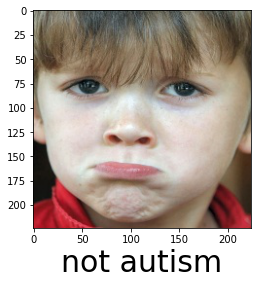

In [ ]:
predictImage("/content/data/Autism/test/non_autistic/004.jpg")